In [1]:
MY_SECRET_KEY="<YOUR_ROBOFLOW_SECRET_KEY>"

In [2]:
!pip install ultralytics
!pip install roboflow

In [3]:
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image


In [4]:
rf = Roboflow(api_key=MY_SECRET_KEY)
project = rf.workspace("-jwzpw").project("continuous_fire")
dataset = project.version(6).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.27, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to continuous_fire-6 in yolov8:: 100%|██████████| 5030/5030 [00:00<00:00, 9125.64it/s]


# Change data.yaml paths manually after download to match your download paths and only then proceed with the next step


In [5]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/continuous_fire-6/data.yaml epochs=80 imgsz=640 plots=True #training for 80 epochs

100% 21.5M/21.5M [00:00<00:00, 224MB/s]
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/continuous_fire-6/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

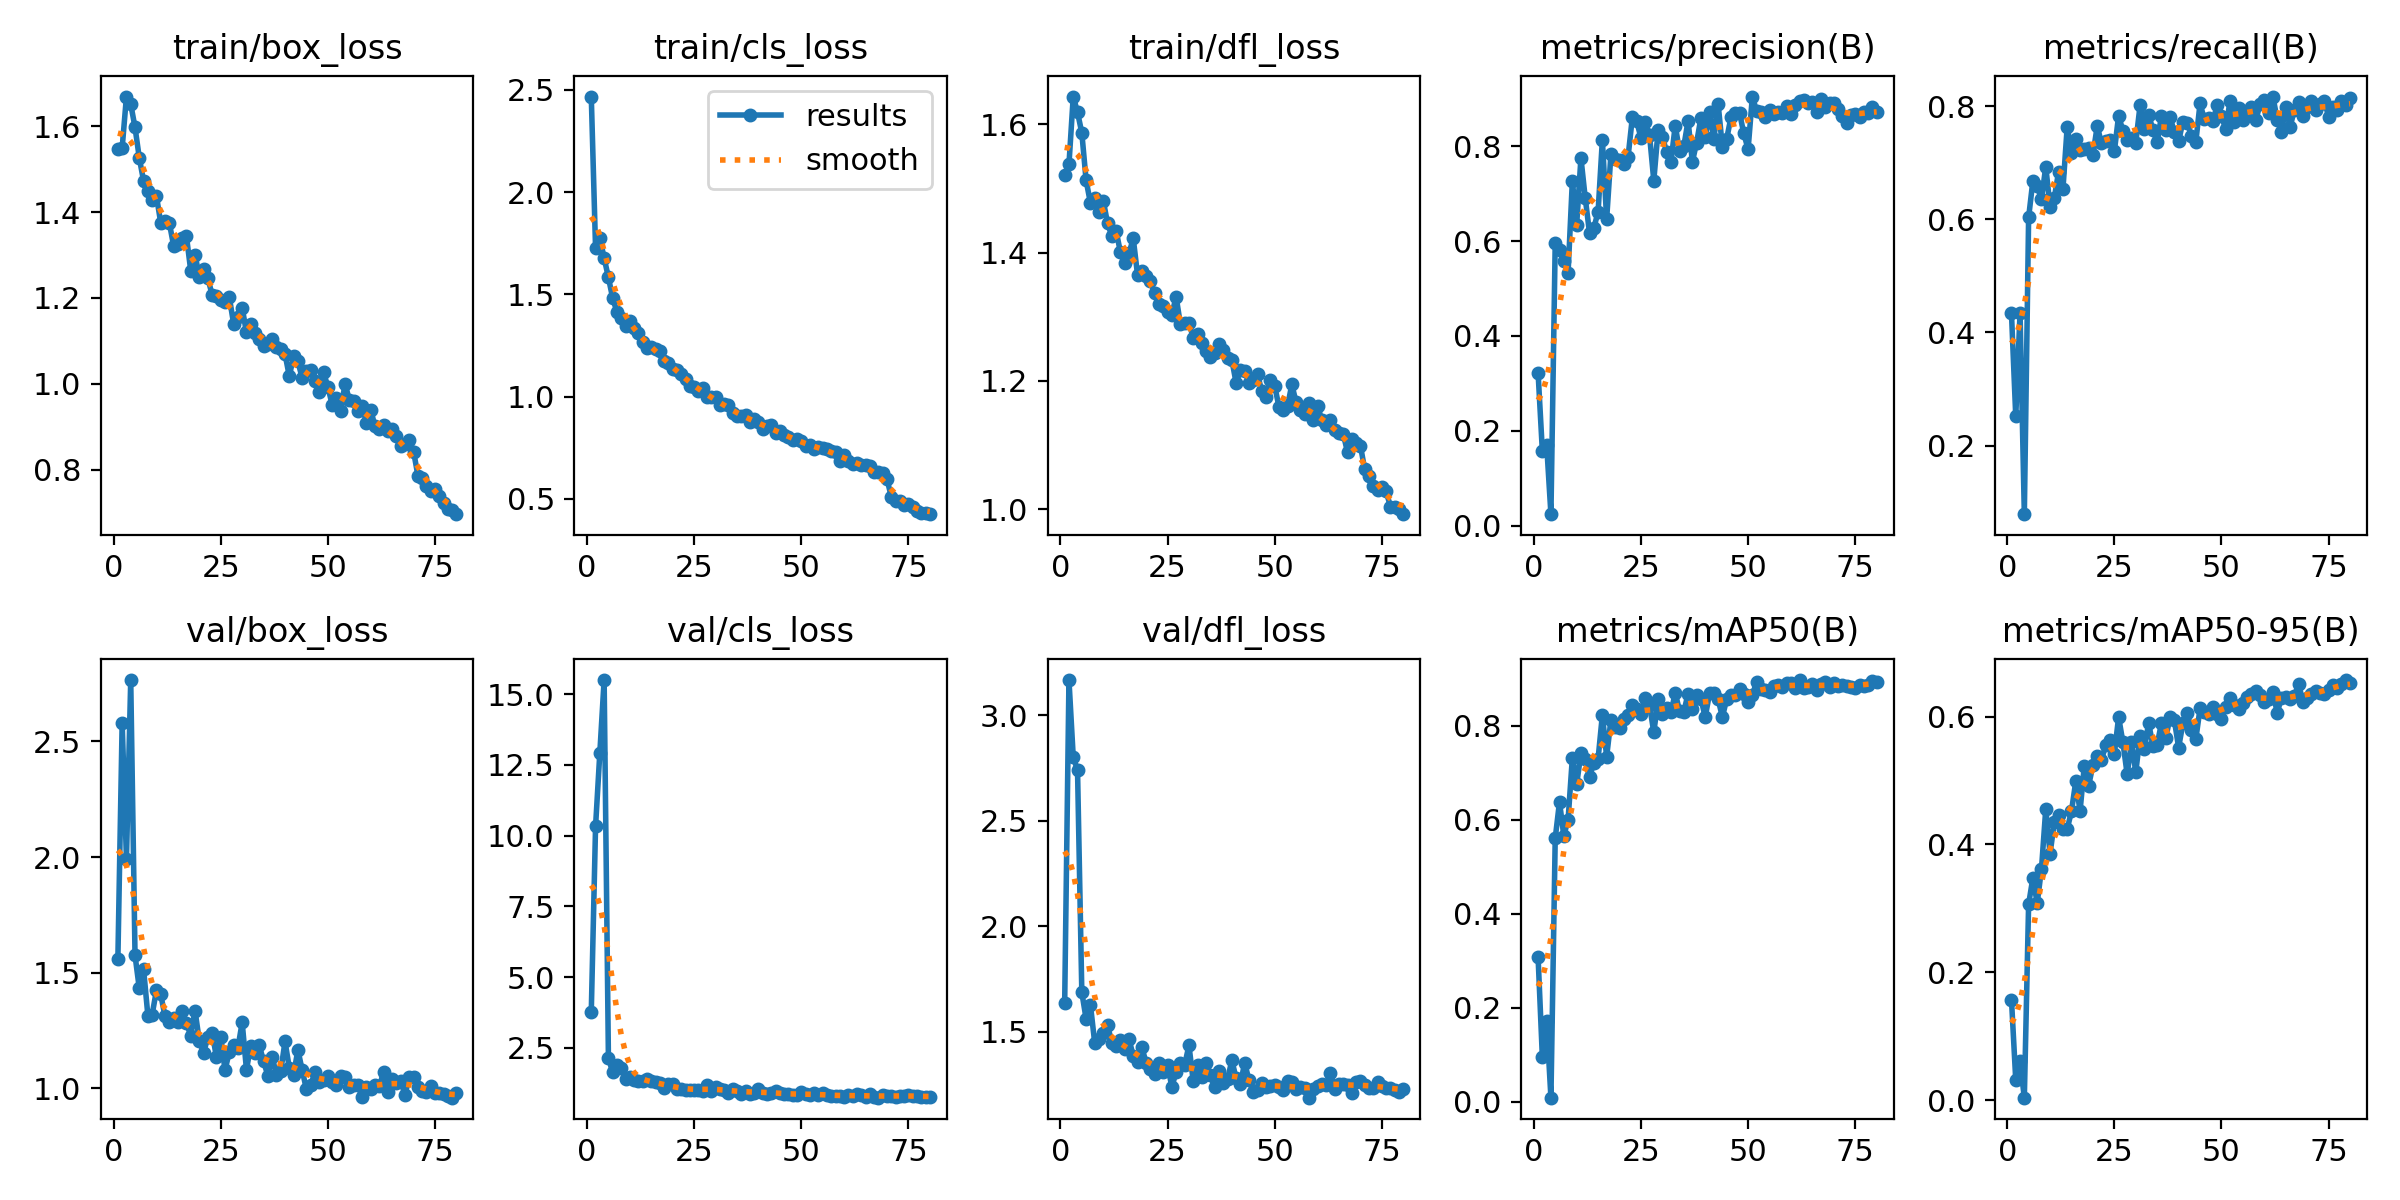

In [6]:
# VIEW MODEL TRANING CHARTS
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [7]:
# VALIDATION
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/continuous_fire-6/data.yaml

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/continuous_fire-6/valid/labels.cache... 754 images, 2 backgrounds, 0 corrupt: 100% 754/754 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 48/48 [00:13<00:00,  3.69it/s]
                   all        754        950      0.883      0.802      0.894      0.656
Speed: 0.8ms preprocess, 8.9ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# predict

In [11]:
!yolo predict model=/content/runs/detect/train/weights/best.pt source='https://youtu.be/DoYF_jh1POs' imgsz=640

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

1/1: https://youtu.be/DoYF_jh1POs... Success ✅ (1156 frames of shape 576x1024 at 29.97 FPS)

0: 640x384 (no detections), 1306.9ms
0: 640x384 (no detections), 9.5ms
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 568, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 439, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 177, in predict_cli
    for _ in gen:  # noqa, running CLI inference without accumulating

# Download all the data

In [12]:
!zip -r /content/file.zip /content/
from google.colab import files
files.download("/content/file.zip")

Streaming output truncated to the last 5000 lines.
  adding: content/continuous_fire-6/valid/labels/Img_7930_jpg.rf.1f08460438e805d5e8a60ffe9a951387.txt (deflated 32%)
  adding: content/continuous_fire-6/valid/labels/Eight4607_png.rf.a59f60becc3ff88707b1a4f8dcb4905d.txt (deflated 51%)
  adding: content/continuous_fire-6/valid/labels/Img_8048_jpg.rf.381e9b1c0346ed0c037ccf5ee9386857.txt (deflated 15%)
  adding: content/continuous_fire-6/valid/labels/FireDataTwo4747_png.rf.3a0a07a84237d10c3b707400665c731c.txt (deflated 35%)
  adding: content/continuous_fire-6/valid/labels/2ndAlarmFire117N5206_png.rf.d1c6322f06b230ac22c62d7db223fb21.txt (deflated 58%)
  adding: content/continuous_fire-6/valid/labels/FireDataThree1705_png.rf.0e78456815e1c4b62fdd9b0b95aa6788.txt (deflated 41%)
  adding: content/continuous_fire-6/valid/labels/Ogdenhousefire2387_png.rf.331cd7db1626cb8352e135c3d2f38391.txt (deflated 41%)
  adding: content/continuous_fire-6/valid/labels/2ndfloorFULLYINVOLVEDHelmetCam3168_png.rf.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>